In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics

from xgboost import plot_importance

from sklearn.metrics import RocCurveDisplay

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 50)

In [2]:
df_raw = pd.read_csv('features_cleaned_not_standardized.csv').drop(['Sex','Age'], axis=1)
df_raw

,File Name,Source,Duration_in_Sec,Zero_Crossings,Amp_range,Avg_amp,Freq_range,Pulses_per_Sec,Mean_MFCC,Mean_Spectral Rolloff,Mean_Melspectrogram,Mean_Spectral Contrast,Mean_Chromagram,Mean_Tempogram,Mean_Tonnetz,Partials,Mean RMS,Species,Call
0,CL-Hiss,wildside sabrina tiktok,2,3052,0.068885,0.006089,3921.000000,404.500000,-7.268548,3364.872373,0.019104,19.925640,0.810778,0.160065,-0.001847,3,0.007630,Clouded leopard,hiss
1,CL-Hiss,wildside sabrina tiktok,1,1649,0.067508,0.008768,2364.000000,546.000000,-6.702535,3613.418302,0.033583,19.957274,0.821026,0.126885,-0.003948,3,0.010948,Clouded leopard,hiss
2,CL-Hiss,wildside sabrina tiktok,1,1265,0.177508,0.009763,2137.000000,461.000000,-6.511350,2918.727805,0.061539,20.534935,0.800632,0.156785,-0.021016,2,0.012784,Clouded leopard,hiss
3,CL-Hiss,wildside sabrina tiktok,1,2671,0.047844,0.007377,4015.000000,987.000000,-6.980524,3696.125377,0.018213,20.329560,0.823546,0.140679,-0.011690,3,0.009123,Clouded leopard,hiss
4,CL-Hiss,wildside sabrina tiktok,1,1744,0.063522,0.007763,2487.000000,628.000000,-5.948235,3509.912109,0.021703,20.561726,0.807700,0.144186,-0.013389,2,0.009595,Clouded leopard,hiss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,Lion Roaring Sequence_17,YouTube,40,22436,0.652970,0.073732,10092.625000,295.250000,-4.387553,1458.415228,3.050521,20.184006,0.580697,0.190296,-0.000172,85,0.088674,Lion,roar
139,Lion Roaring Sequence_18,YouTube,45,127303,1.039453,0.117559,10681.044444,1159.066667,-5.522057,4116.969550,12.378446,20.695561,0.593314,0.184751,0.001714,139,0.141392,Lion,roar
140,Lion Roaring Sequence_18,YouTube,17,32072,1.021872,0.181167,10494.470588,898.411765,-3.991339,3033.963691,24.540840,20.218510,0.616647,0.182995,-0.004780,98,0.219604,Lion,roar
141,Lion Roaring Sequence_19,YouTube,19,23112,0.747216,0.123384,5462.315789,315.631579,-5.297592,2002.811373,9.278934,21.174380,0.515771,0.224227,0.006657,38,0.142555,Lion,roar


In [3]:
"Pull records containing 'Clouded leopard','Jaguar','Leopard','Lion' but not Snow Leopard due to unbalanced data"

df_raw = df_raw[df_raw.Species.isin(['Clouded leopard','Jaguar','Leopard','Lion'])]

"Remove records with mew, hiss, puff"
df_raw = df_raw[df_raw.Call.isin(['roar','prusten','growl'])]

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 6 to 142
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   File Name               125 non-null    object 
 1   Source                  125 non-null    object 
 2   Duration_in_Sec         125 non-null    int64  
 3   Zero_Crossings          125 non-null    int64  
 4   Amp_range               125 non-null    float64
 5   Avg_amp                 125 non-null    float64
 6   Freq_range              125 non-null    float64
 7   Pulses_per_Sec          125 non-null    float64
 8   Mean_MFCC               125 non-null    float64
 9   Mean_Spectral Rolloff   125 non-null    float64
 10  Mean_Melspectrogram     125 non-null    float64
 11  Mean_Spectral Contrast  125 non-null    float64
 12  Mean_Chromagram         125 non-null    float64
 13  Mean_Tempogram          125 non-null    float64
 14  Mean_Tonnetz            125 non-null    fl

In [4]:
df_raw.groupby('Call').describe().to_csv('Table for journal2.csv')

In [5]:
df = pd.read_csv('features_cleaned2.csv')
df

,File Name,Duration_in_Sec,Zero_Crossings,Amp_range,Avg_amp,Freq_range,Pulses_per_Sec,Mean_MFCC,Mean_Spectral Rolloff,Mean_Melspectrogram,Mean_Spectral Contrast,Mean_Chromagram,Mean_Tempogram,Mean_Tonnetz,Partials,Mean RMS,Sex,Age,Species,Call
0,Acinonyx_jubatus_S0612_02,-0.605682,-0.601727,-0.652219,-0.302150,-1.253581,-0.627236,0.821527,-1.137651,-0.238886,-0.135234,0.330343,-0.822152,-0.922610,-0.424178,-0.316481,Unknown,Adult,A. jubatus,growl
1,Acinonyx_jubatus_S0612_02,-0.218505,-0.430594,0.216786,0.373251,-0.399175,-0.335683,1.097614,-1.213548,-0.057318,0.016933,-0.257340,-0.923002,-0.954407,0.291424,0.336062,Unknown,Adult,A. jubatus,NaN
2,Acinonyx_jubatus_S0612_02,-0.089447,-0.459967,-0.291151,-0.061413,-0.846215,-0.557911,0.953337,-1.400217,-0.199837,0.124721,-0.458477,0.787031,0.254189,-0.198198,-0.072508,Unknown,Adult,A. jubatus,growl
3,Acinonyx_jubatus_S0612_02,-0.089447,-0.452250,0.002743,-0.038130,-0.462855,-0.548667,0.877752,-1.300183,-0.177357,-0.141480,0.296804,-0.309274,0.091535,-0.085208,-0.066355,Unknown,Adult,A. jubatus,NaN
4,Acinonyx_jubatus_S0612_02,-0.347564,-0.526242,-0.198208,0.159550,-0.844016,-0.522477,0.980334,-1.435716,-0.145668,0.202517,-0.817708,0.473492,-0.100777,-0.311188,0.152876,Unknown,Adult,A. jubatus,growl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,Lion Roaring Sequence_17,4.427611,0.750531,1.670677,1.695678,1.569890,-0.577553,0.458927,-1.172240,0.782396,1.185597,-1.401070,0.418225,-0.234203,2.701873,1.566768,Male,Adult,Lion,roar
602,Lion Roaring Sequence_18,5.072905,7.276403,3.246647,3.211052,1.749604,0.753217,0.090813,0.185017,4.013036,1.545689,-1.258973,0.323122,-0.085715,4.735690,3.009221,Male,Adult,Lion,roar
603,Lion Roaring Sequence_18,1.459259,1.350179,3.174955,5.410373,1.692621,0.351660,0.587486,-0.367884,8.225368,1.209885,-0.996199,0.293001,-0.597020,3.191496,5.149242,Male,Adult,Lion,roar
604,Lion Roaring Sequence_19,1.717376,0.792598,2.054986,3.412455,0.155712,-0.546154,0.163645,-0.894312,2.939548,1.882738,-2.132262,1.000131,0.303535,0.931700,3.041052,Male,Adult,Lion,roar


In [6]:
df.shape

(606, 20)

In [7]:
"Pull records containing 'Clouded leopard','Jaguar','Leopard','Lion' but not Snow Leopard due to unbalanced data"

df = df[df.Species.isin(['Clouded leopard','Jaguar','Leopard','Lion'])]

"Remove records with mew, hiss, puff"
df = df[df.Call.isin(['roar','prusten','growl'])]

In [8]:
df.shape

(125, 20)

l= ['Duration_in_Sec', 'Zero_Crossings', 'Amp_range',
       'Avg_amp', 'Freq_range', 'Pulses_per_Sec', 'Mean_MFCC',
       'Mean_Spectral Rolloff', 'Mean_Melspectrogram',
       'Mean_Spectral Contrast', 'Mean_Chromagram', 'Mean_Tempogram',
       'Mean_Tonnetz', 'Partials','Mean RMS']

plt.figure(figsize=(25,30))
for i in range(len(l)):
    plt.subplot(8,2,i+1)
    sns.scatterplot(df[l[i]], df['Species'], hue=df['Call'], legend='brief', palette='deep') 
plt.savefig('Species Clusters By Features.pdf')
plt.show()

l= ['Duration_in_Sec', 'Zero_Crossings', 'Amp_range',
       'Avg_amp', 'Freq_range', 'Pulses_per_Sec', 'Mean_MFCC',
       'Mean_Spectral Rolloff', 'Mean_Melspectrogram',
       'Mean_Spectral Contrast', 'Mean_Chromagram', 'Mean_Tempogram',
       'Mean_Tonnetz', 'Partials','Mean RMS']

plt.figure(figsize=(25,30))
for i in range(len(l)):
    plt.subplot(8,2,i+1)
    sns.scatterplot(df[l[i]], df['Call'], hue=df['Species'], legend='brief', palette='deep') 
plt.savefig('Call Clusters By Features.pdf')
plt.show()

In [9]:
df.columns

Index(['File Name', 'Duration_in_Sec', 'Zero_Crossings', 'Amp_range',
       'Avg_amp', 'Freq_range', 'Pulses_per_Sec', 'Mean_MFCC',
       'Mean_Spectral Rolloff', 'Mean_Melspectrogram',
       'Mean_Spectral Contrast', 'Mean_Chromagram', 'Mean_Tempogram',
       'Mean_Tonnetz', 'Partials', 'Mean RMS', 'Sex', 'Age', 'Species',
       'Call'],
      dtype='object')

In [10]:
X = df[pd.notnull(df['Call'])][['Duration_in_Sec','Zero_Crossings', 'Amp_range',
       'Avg_amp', 'Freq_range', 'Pulses_per_Sec', 'Mean_MFCC',
       'Mean_Spectral Rolloff', 'Mean_Melspectrogram',
       'Mean_Spectral Contrast', 'Mean_Chromagram', 'Mean_Tempogram', 'Mean RMS']]
y = df[pd.notnull(df['Call'])][['Call','Species']]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(87, 13)
(38, 13)
(87, 2)
(38, 2)


In [13]:
print('Total Call Values')
print(df['Call'].value_counts())
print('\n')
print('Call values for Training')
print(y_train.Call.value_counts())
print('\n')
print('Call values for Testing')
print(y_test.Call.value_counts())

Total Call Values
roar       65
prusten    40
growl      20
Name: Call, dtype: int64


Call values for Training
roar       46
prusten    26
growl      15
Name: Call, dtype: int64


Call values for Testing
roar       19
prusten    14
growl       5
Name: Call, dtype: int64


In [14]:
print('Calls trained for but not tested for')
print(set(np.unique(y_train.Call))-set(np.unique(y_test.Call)))
print('Calls test for but not trained for')
print(set(np.unique(y_test.Call))-set(np.unique(y_train.Call)))

Calls trained for but not tested for
set()
Calls test for but not trained for
set()


In [15]:
print('Total Species values')
print(df['Species'].value_counts())
print('\n')
print('Species values for Training')
print(y_train.Species.value_counts())
print('\n')
print('Species values for Testing')
print(y_test.Species.value_counts())

Total Species values
Leopard            41
Lion               33
Clouded leopard    29
Jaguar             22
Name: Species, dtype: int64


Species values for Training
Leopard            30
Lion               25
Clouded leopard    17
Jaguar             15
Name: Species, dtype: int64


Species values for Testing
Clouded leopard    12
Leopard            11
Lion                8
Jaguar              7
Name: Species, dtype: int64


In [16]:
print('Species trained for but not tested for')
print(set(np.unique(y_train.Species))-set(np.unique(y_test.Species)))
print('Species test for but not trained for')
print(set(np.unique(y_test.Species))-set(np.unique(y_train.Species)))

Species trained for but not tested for
set()
Species test for but not trained for
set()


# Vocalization Classification

## Splitting data

In [17]:
y_train_call = y_train.Call
y_test_call = y_test.Call

## XGBoost Classifier

In [18]:
parameters = dict(
    objective='multi:softprob',
    random_state = 42,
    max_depth=9,
    learning_rate=0.01,
    subsample=0.8,
    colsample_bytree=0.4,
    tree_method='gpu_hist')
#eval_metric='mlogloss'

clf1 = XGBClassifier(n_estimators=1200)

In [19]:
clf1.fit(X_train, y_train_call)

[21:25:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1200, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [20]:
clf1.score(X_test, y_test_call)

0.9210526315789473

In [21]:
y_clf1 = clf1.predict(X_test)
prob_clf1 = clf1.predict_proba(X_test)

In [22]:
print('1. Tested Calls')
print(np.unique(y_test_call))
print('2. Predicted Calls')
print(np.unique(y_clf1))
print('3. Not tested for but predicted')
print(set(np.unique(y_clf1))-set(np.unique(y_test_call)))
print('4. Tested for but not predicted')
print(set(np.unique(y_test_call))-set(np.unique(y_clf1)))

1. Tested Calls
['growl' 'prusten' 'roar']
2. Predicted Calls
['growl' 'prusten' 'roar']
3. Not tested for but predicted
set()
4. Tested for but not predicted
set()


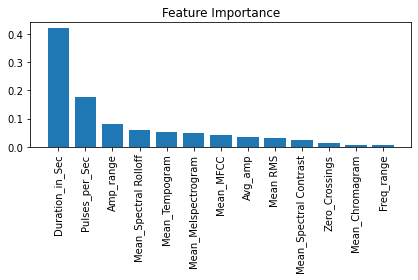

In [23]:
importances = clf1.feature_importances_
imp = np.argsort(importances)[::-1]


plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[imp], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[imp], rotation=90)
plt.tight_layout()
plt.savefig('Feature Importance in Call Classification With XGBoost.png')
plt.show()

Accuracy 0.9210526315789473


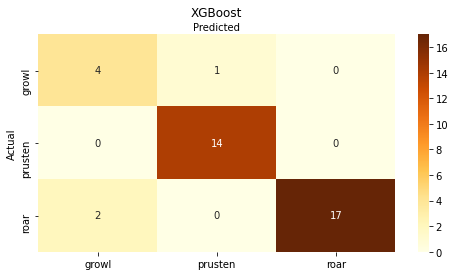

In [24]:
names_rf = sorted(list(set(np.unique(y_test_call)).union(set(y_clf1))))
cnf = confusion_matrix(y_test_call, y_clf1)
fig, ax = plt.subplots(figsize=(8,4))

print('Accuracy',clf1.score(X_test, y_test_call))

sns.heatmap(cnf, annot=True, xticklabels=names_rf, yticklabels=names_rf,cmap= "YlOrBr")
plt.title('XGBoost')
ax.xaxis.set_label_position('top')
plt.ylabel('Actual')
plt.xlabel('Predicted')
#plt.savefig('RF.png')
plt.show(block=False)


[21:25:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:25:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:25:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


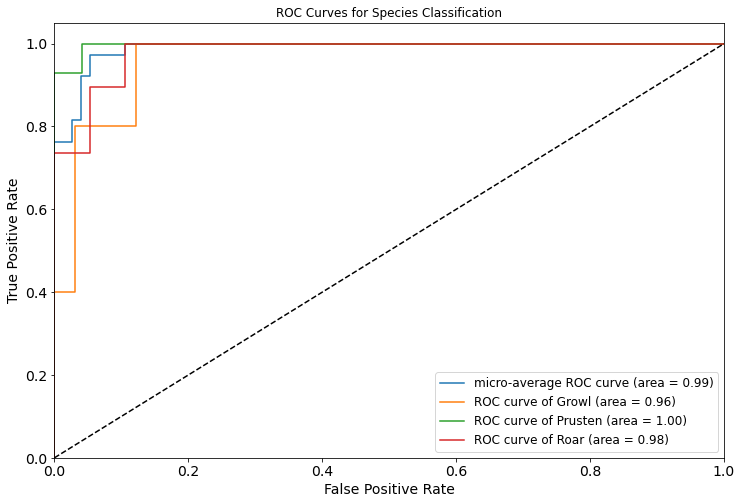

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

X = df[pd.notnull(df['Call'])][['Duration_in_Sec','Zero_Crossings', 'Amp_range',
       'Avg_amp', 'Freq_range', 'Pulses_per_Sec', 'Mean_MFCC',
       'Mean_Spectral Rolloff', 'Mean_Melspectrogram',
       'Mean_Spectral Contrast', 'Mean_Chromagram', 'Mean_Tempogram', 'Mean RMS']]
df['Call'] = df['Call'].astype('category')
df['Call'] = df['Call'].cat.codes
y = df[pd.notnull(df['Call'])]['Call']

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# shuffle and split training and test sets
X_train_roc, X_test_roc, y_train_roc, y_test_roc = train_test_split(X, y, test_size=.30, random_state=42)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(XGBClassifier(n_estimators=1200))
y_score = classifier.fit(X_train_roc, y_train_roc).predict_proba(X_test_roc)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_roc.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# Plot ROC curve
plt.figure(figsize=(12,8))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))


for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curves for Species Classification')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

L = plt.legend(loc="lower right", prop={'size': 12})


L.get_texts()[1].set_text('ROC curve of Growl (area = 0.96)')
L.get_texts()[2].set_text('ROC curve of Prusten (area = 1.00)')
L.get_texts()[3].set_text('ROC curve of Roar (area = 0.98)')


plt.savefig('ROC Call071722.png')
plt.show()

# Species Classification

## Splitting data

In [26]:
y_train_species = y_train.Species
y_test_species = y_test.Species

## XGBoost Classifier

In [27]:
parameters = dict(
    objective='multi:softprob',
    random_state = 42,
    max_depth=9,
    learning_rate=0.01,
    subsample=0.8,
    colsample_bytree=0.4,
    tree_method='gpu_hist',
    num_class=2)
#eval_metric='mlogloss'

clf1 = XGBClassifier(**parameters,n_estimators=1200)

In [28]:
clf1.fit(X_train, y_train_species)

[21:25:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1200, n_jobs=12, num_class=2, num_parallel_tree=1,
              objective='multi:softprob', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.8,
              tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [29]:
clf1.score(X_test, y_test_species)

0.8421052631578947

In [30]:
y_clf1 = clf1.predict(X_test)
prob_clf1 = clf1.predict_proba(X_test)

In [31]:
print('1. Tested Calls')
print(np.unique(y_test_species))
print('2. Predicted Calls')
print(np.unique(y_clf1))
print('3. Not tested for but predicted')
print(set(np.unique(y_clf1))-set(np.unique(y_test_species)))
print('4. Tested for but not predicted')
print(set(np.unique(y_test_species))-set(np.unique(y_clf1)))

1. Tested Calls
['Clouded leopard' 'Jaguar' 'Leopard' 'Lion']
2. Predicted Calls
['Clouded leopard' 'Jaguar' 'Leopard' 'Lion']
3. Not tested for but predicted
set()
4. Tested for but not predicted
set()


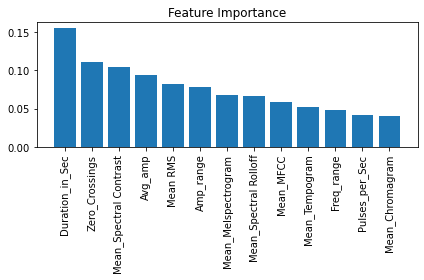

In [32]:
importances = clf1.feature_importances_
imp = np.argsort(importances)[::-1]


plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[imp], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[imp], rotation=90)
plt.tight_layout()
#plt.savefig('Feature Importance in Call Classification With XGBoost.png')
plt.show()

Accuracy 0.8421052631578947


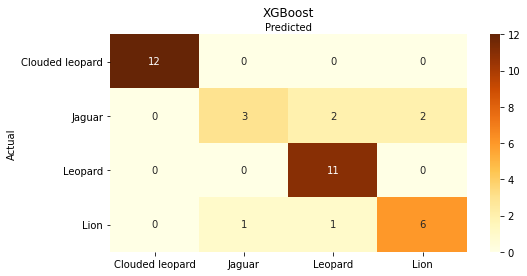

In [33]:
names_rf = sorted(list(set(np.unique(y_test_species)).union(set(y_clf1))))
cnf = confusion_matrix(y_test_species, y_clf1)
fig, ax = plt.subplots(figsize=(8,4))

print('Accuracy',clf1.score(X_test, y_test_species))

sns.heatmap(cnf, annot=True, xticklabels=names_rf, yticklabels=names_rf,cmap= "YlOrBr")
plt.title('XGBoost')
ax.xaxis.set_label_position('top')
plt.ylabel('Actual')
plt.xlabel('Predicted')
#plt.savefig('RF.png')
plt.show(block=False)


[21:25:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:26:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:26:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:26:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

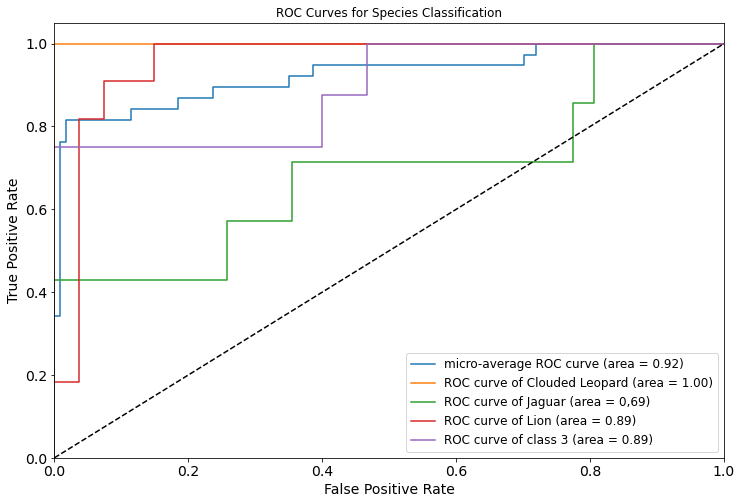

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

X = df[pd.notnull(df['Call'])][['Duration_in_Sec','Zero_Crossings', 'Amp_range',
       'Avg_amp', 'Freq_range', 'Pulses_per_Sec', 'Mean_MFCC',
       'Mean_Spectral Rolloff', 'Mean_Melspectrogram',
       'Mean_Spectral Contrast', 'Mean_Chromagram', 'Mean_Tempogram', 'Mean RMS']]
df['Species'] = df['Species'].astype('category')
df['Species'] = df['Species'].cat.codes
y = df[pd.notnull(df['Species'])]['Species']

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2, 3])
n_classes = y.shape[1]

# shuffle and split training and test sets
X_train_roc, X_test_roc, y_train_roc, y_test_roc = train_test_split(X, y, test_size=.30, random_state=42)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(XGBClassifier(**parameters, n_estimators=1200))
y_score = classifier.fit(X_train_roc, y_train_roc).predict_proba(X_test_roc)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_roc.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# Plot ROC curve
plt.figure(figsize=(12,8))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))


for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curves for Species Classification')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

L = plt.legend(loc="lower right", prop={'size': 12})

L.get_texts()[1].set_text('ROC curve of Clouded Leopard (area = 1.00)')
L.get_texts()[2].set_text('ROC curve of Jaguar (area = 0,69)')
L.get_texts()[3].set_text('ROC curve of Leopard (area = 0.96)')
L.get_texts()[3].set_text('ROC curve of Lion (area = 0.89)')


plt.savefig('ROC Species071722.png')
plt.show()